<a href="https://colab.research.google.com/github/shreydan/fastai-starters/blob/main/fastai_oxford_pets_resnet10t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 26.9 MB/s 


In [49]:
from fastai.vision.all import *
import torch
import torch.nn as nn
from collections import Counter
import re
import timm

# **Dataset and Dataloaders**

In [4]:
ds_path = untar_data(URLs.PETS)

In [5]:
ds_path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
files = get_image_files(ds_path/'images')

In [7]:
len(files)

7390

In [8]:
files[0].name, files[1].name

('pug_160.jpg', 'shiba_inu_110.jpg')

In [9]:
def get_breed(name):
    breed = re.findall('^(.*)_\d+.jpg',name)
    return breed[0].lower()

get_breed(files[0].name)

'pug'

In [10]:
labels = [get_breed(f.name) for f in files]

In [11]:
classes = list(Counter(labels))
len(classes), classes

(37,
 ['pug',
  'shiba_inu',
  'boxer',
  'american_bulldog',
  'saint_bernard',
  'ragdoll',
  'pomeranian',
  'english_cocker_spaniel',
  'keeshond',
  'miniature_pinscher',
  'great_pyrenees',
  'yorkshire_terrier',
  'staffordshire_bull_terrier',
  'russian_blue',
  'samoyed',
  'newfoundland',
  'bombay',
  'basset_hound',
  'leonberger',
  'english_setter',
  'siamese',
  'abyssinian',
  'maine_coon',
  'havanese',
  'british_shorthair',
  'birman',
  'chihuahua',
  'wheaten_terrier',
  'german_shorthaired',
  'japanese_chin',
  'bengal',
  'persian',
  'beagle',
  'egyptian_mau',
  'american_pit_bull_terrier',
  'sphynx',
  'scottish_terrier'])

In [12]:
dls = ImageDataLoaders.from_lists(ds_path, 
                                  files, 
                                  labels,
                                  item_tfms= Resize(384),
                                  batch_tfms=aug_transforms(size=224),
                                  )

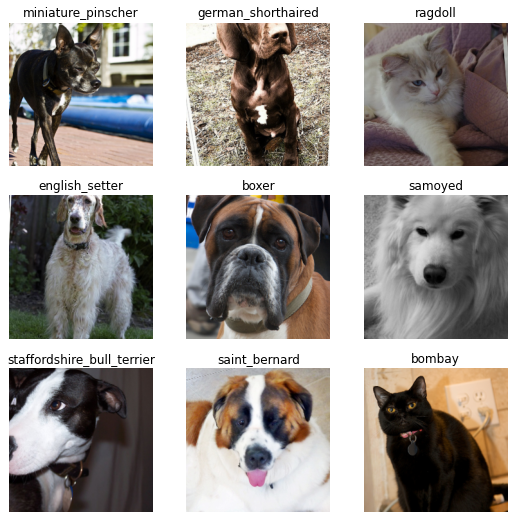

In [13]:
dls.show_batch()

In [14]:
len(dls.train_ds), len(dls.valid_ds)

(5912, 1478)

# **Training**

- model: `resnet10t`
- metrics: f1_macro, f1_samples
- lr: using `lr_find()`
- learner: fit_one_cycle 

In [53]:
model = timm.create_model('resnet10t', pretrained=True, num_classes=37)

learner = Learner(dls, 
                  model, 
                  loss_func=nn.CrossEntropyLoss(),
                  metrics=[error_rate,accuracy]
                  )

SuggestedLRs(valley=0.0002290867705596611)

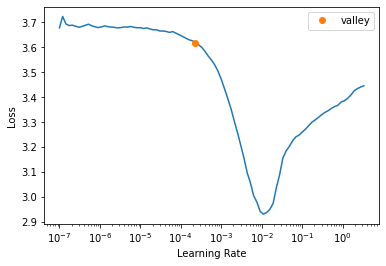

In [54]:
learner.lr_find()

In [56]:
callbacks = EarlyStoppingCallback(monitor='valid_loss', patience=1)

In [57]:
learner.fine_tune(5,2e-4,cbs=callbacks)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.558941,1.138778,0.301759,0.698241,00:59


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.177333,0.880307,0.190122,0.809878,00:58
1,0.842667,0.581371,0.140731,0.859269,00:58
2,0.612503,0.478307,0.119080,0.880920,00:57
3,0.494595,0.429300,0.111637,0.888363,00:58
4,0.437733,0.425447,0.104195,0.895805,00:59
